Default (10 trees) Accuracy: 0.8182


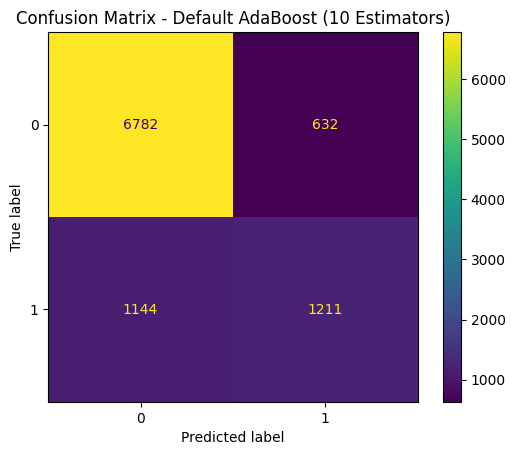

Best Accuracy: 0.8340 with 73 estimators


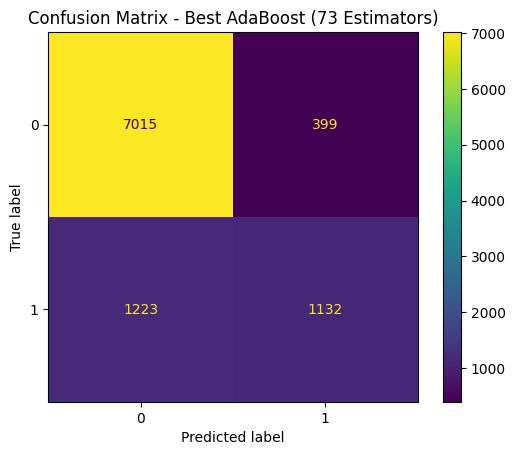

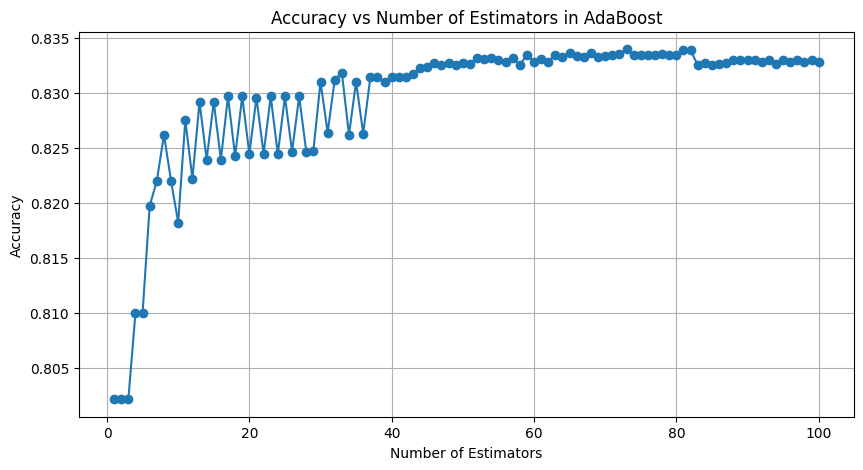

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


data = pd.read_csv("income.csv")

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

for col in X.select_dtypes(include=['object']).columns:
    X[col] = LabelEncoder().fit_transform(X[col])
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


ada_default = AdaBoostClassifier(n_estimators=10, random_state=42)
ada_default.fit(X_train, y_train)
y_pred_default = ada_default.predict(X_test)
default_score = accuracy_score(y_test, y_pred_default)


print(f"Default (10 trees) Accuracy: {default_score:.4f}")
cm_default = confusion_matrix(y_test, y_pred_default)
disp_default = ConfusionMatrixDisplay(confusion_matrix=cm_default)
disp_default.plot()
plt.title("Confusion Matrix - Default AdaBoost (10 Estimators)")
plt.show()


scores = []
estimators_range = range(1, 101)

for n in estimators_range:
    ada = AdaBoostClassifier(n_estimators=n, random_state=42)
    ada.fit(X_train, y_train)
    y_pred = ada.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    scores.append(acc)


best_score = max(scores)
best_n = estimators_range[scores.index(best_score)]
print(f"Best Accuracy: {best_score:.4f} with {best_n} estimators")


ada_best = AdaBoostClassifier(n_estimators=best_n, random_state=42)
ada_best.fit(X_train, y_train)
y_pred_best = ada_best.predict(X_test)

cm_best = confusion_matrix(y_test, y_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best)
disp_best.plot()
plt.title(f"Confusion Matrix - Best AdaBoost ({best_n} Estimators)")
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(estimators_range, scores, marker='o')
plt.title("Accuracy vs Number of Estimators in AdaBoost")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
